# Question 1

Question 1 was a simple plotting exercises from data files. As we can see from the plots MC2 better represents the real data than MC1 and this is evidenced by the chi-square test completed with a P value for MC2 > 0.05 which represents a 95% confidence. 

MC1 chi square: 483.736925
MC2 Chi Square: 28.137460
Using Chi-Square Distribution Applet MC1 Chisquare= 483.736925, P = 0, MC2 chisquare =28.137460, P=0.106190
So MC1 is independent of the Real MAss Data and MC2 is dependent of real mass data with P value > 0.05


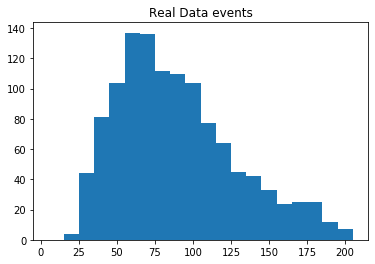

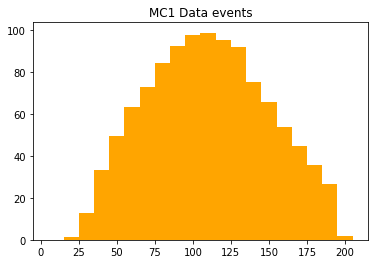

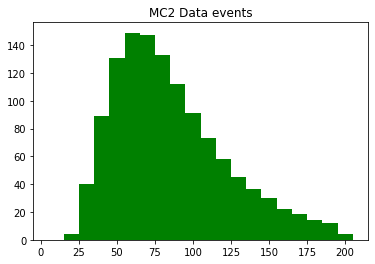

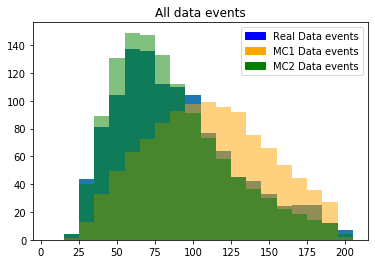

In [136]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import matplotlib.patches as mpatches

#load data
real_mass_1 = np.loadtxt("real_mass.txt")[:,0 ] #first column of data set real_mass (lower bin boundaries)
real_mass_2 = np.loadtxt("real_mass.txt")[:,1 ] #second column of data set real_mass (upper bin boundary)
real_mass_3 = np.loadtxt("real_mass.txt")[:,2 ] #third column of data set real_mass (no. entries)

MC1_mass_1 = np.loadtxt("MC1_mass.txt")[:,0 ] #first column of data set MC1_mass (lower bin boundaries)
MC1_mass_2 = np.loadtxt("MC1_mass.txt")[:,1 ] #second column of data set MC1_mass (upper bin boundary)
MC1_mass_3 = np.loadtxt("MC1_mass.txt")[:,2 ] #third column of data set MC1_mass (no. entries)

MC2_mass_1 = np.loadtxt("MC2_mass.txt")[:,0 ] #first column of data set MC2_mass (lower bin boundaries)
MC2_mass_2 = np.loadtxt("MC2_mass.txt")[:,1 ] #second column of data set MC2_mass (upper bin boundary)
MC2_mass_3 = np.loadtxt("MC2_mass.txt")[:,2 ] #third column of data set MC2_mass (no. entries)

real_mass_bins = [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200]
ax = plt.figure(1)
ax =plt.bar(real_mass_bins, real_mass_3, width = 10)
ax = plt.title('Real Data events')

ay = plt.figure(2)
ay = plt.bar(real_mass_bins, MC1_mass_3, width=10, color= 'orange')
ay = plt.title('MC1 Data events')

az = plt.figure(3)
az = plt.bar(real_mass_bins, MC2_mass_3, width=10, color= 'green')
az = plt.title('MC2 Data events')


plt.figure(4)
blue_patch = mpatches.Patch(color='blue', label='Real Data events')
orange_patch = mpatches.Patch(color='orange', label='MC1 Data events')
green_patch =  mpatches.Patch(color='green', label='MC2 Data events')
plt.bar(real_mass_bins, real_mass_3, width = 10)
plt.bar(real_mass_bins, MC1_mass_3, width=10, color= 'orange', alpha=0.5)
plt.bar(real_mass_bins, MC2_mass_3, width=10, color= 'green', alpha=0.5)
plt.legend(handles=[blue_patch, orange_patch, green_patch])
plt.title('All data events')



MC1_chisquare =0
for i in range(0,20):
    MC1_chisquare += (real_mass_3[i]-MC1_mass_3[i])**2 / (MC1_mass_3[i])
    
print('MC1 chi square: %f' %MC1_chisquare)

MC2_chisquare =0
for i in range(0,20):
    MC2_chisquare += (real_mass_3[i]-MC2_mass_3[i])**2 / (MC2_mass_3[i])
    
print('MC2 Chi Square: %f' %MC2_chisquare)

print('Using Chi-Square Distribution Applet MC1 Chisquare= %f, P = %d, MC2 chisquare =%f, P=%f' %(MC1_chisquare, 0, MC2_chisquare, 0.10619))
print('So MC1 is independent of the Real MAss Data and MC2 is dependent of real mass data with P value > 0.05')

Part 2 was particularly difficult as I wasn't entirely sure what the question was asking. The fist cell I have added below is a pseudocode algorithm from which I tried to create a python code for. I added this to show my working. 

The important things I added in was that for each bin I created a single random variable that was poisson distributed around the expected value aka the frequency value for MC1/MC2.

I then parsed these into arrays from which I compared them to the chisquare MC1/MC2 values. If the value of these poisson chisquare values was greater than the MC1/MC2 chi square values then +1 until a fraction was made which would be the P value. Using this brute-force (probably not the best method) I got a P value for MC1 which was less than 0.005 and a P value for MC2 which was greater than 0.005, therefore showing that this produces the same conclusion as in part 1. 

In [3]:


#enter number of MC experiments 
#--->num_experi

#loop from i=1, num_experi

    #generate data -- each bin is treated as a poisson variable with mean = E[n_i]
    #E[n_i] is freq of MC1, MC2
    #loop j=1, num_points=20
        #np.random.poisson(lambda=E[n_j],20 )
    #end

    #compute chi^2 and enter into histogram

    #chi2 =0
    #loop j=1, num_points=20
        #chi2 = chi2 + (real_mass_3[i]-MC1_mass_3[i])**2 / (MC1_mass_3[i])
    #end loop

    #put into histogram ??

#end loop

#for comparison compute theoretical chi2 dist using a gamma function.

#n_dof = num_points=20
#bin_width = 10
#loop i=1,100
    #f=i**(n_dof/2.-1.)*np.exp(-i/2.) / (2.**(n_dof/2.)*np.gamma(n_dof/2.))

    

In [47]:
from scipy.special import gamma
import numpy as np
import matplotlib.pyplot as plt



#init
num_experi =10000#no. experiments
num_points = 20 #also dof
poisson_dist_1 = np.zeros(num_points)
poisson_dist_2 = np.zeros(num_points)

k=0
a_1=[]
a_2=[]
while k < num_experi:
    
    #for j in range(0,20):
        #poisson_dist_1[j] = np.random.poisson(MC1_mass_3[j], 1)
        
    
    chi2_1=0
    for i in range(0,20):
        
        chi2_1 += (poisson.rvs(MC1_mass_3[i])-MC1_mass_3[i])**2 / (MC1_mass_3[i])
    
    a_1.append(chi2_1)
    #for j in range(0,20):
        #poisson_dist_2[j] = np.random.poisson(MC2_mass_3[j], 1)
        
    #print(poisson_dist)
   
    chi2_2=0
    for i in range(0,20):
        
        chi2_2 += (poisson.rvs(MC2_mass_3[i])-MC2_mass_3[i])**2 / (MC2_mass_3[i])
    
    a_2.append(chi2_2)
    k+=1

    
a1=0
a2=0

for i in range(len(a_1)):
    if(a_1[i]> MC1_chisquare):
        a1+=1
for i in range(len(a_2)):
    if(a_2[i]> MC2_chisquare):
        a2+=1

a1 = a1/len(a_1)
a2=a2/len(a_2)

print(a1)
print(a2)
print('For MC1 the pseudodata gives a P value of %f which is < 0.05 and for MC2 the pseudodata gives a P value of %f which is > 0.05. Overall there is no change in the conclusion '%(a1,a2))

0.0014
0.0932
For MC1 the pseudodata gives a P value of 0.001400 which is < 0.05 and for MC2 the pseudodata gives a P value of 0.093200 which is > 0.05. Overall there is no change in the conclusion 


For part 3 I also brute forced this as I couldn't make a minimization/curve fitting function work. For this I simply found the difference between the combination function given and the real_mass data. I then found the minimum for this and compared it to my x values for the histogram to optimize a. 

For the second part of this question I only compared it to the real_mass data, I was unsure on how to compare it to the pseudodata and results I got were very big numbers.

I would say for the P value I got when comparing the combined optimal function vs the real_mass data the data can be fully described by this optimal background combination. 

Optimal a=0.141414
Chi-Squared between the combined function and the real_mass data = 14.934983
This corresponds to a P value of 0.78012


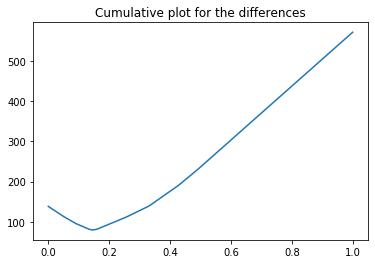

In [164]:
from scipy.optimize import minimize_scalar
import matplotlib.patches as mpatches
from scipy.optimize import curve_fit
from scipy.optimize import least_squares

def sumModel(a):
    return a*MC1_mass_3+(1-a)*MC2_mass_3

# plt.bar(real_mass_bins, real_mass_3, width = 10)

xs = []
sd = []
for i in np.linspace(0,1,100) :
    arr = sumModel(i)
    diff = np.abs(arr - real_mass_3)
    sumdiff = np.sum(diff)
    xs = np.append(xs,i)
    sd = np.append(sd,sumdiff)

plt.plot(xs,sd)
plt.title('Cumulative plot for the differences')


opta=xs[np.where(sd==np.min(sd))]

print('Optimal a=%f'%opta)

#between combined and real
a_chisquare =0
for i in range(0,20):
    a_chisquare += (real_mass_3[i]-(opta*MC1_mass_3[i]+(1-opta)*MC2_mass_3[i]))**2 / (opta*MC1_mass_3[i]+(1-opta)*MC2_mass_3[i])


print('Chi-Squared between the combined function and the real_mass data = %f'%a_chisquare)
print('This corresponds to a P value of 0.78012')



[0.14141414]


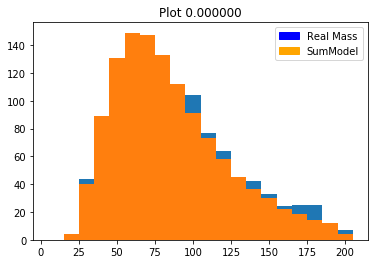

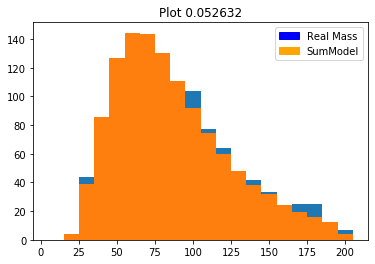

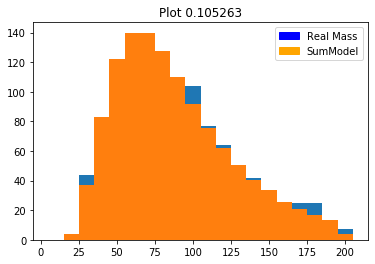

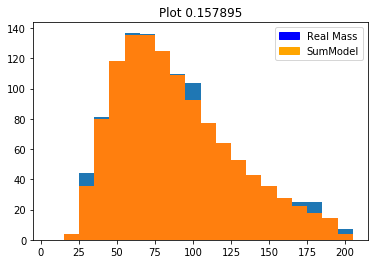

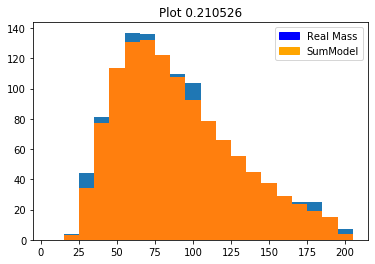

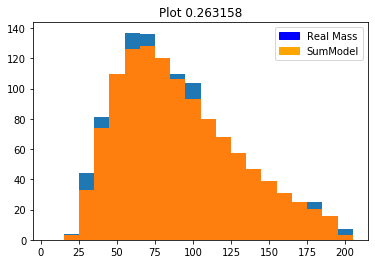

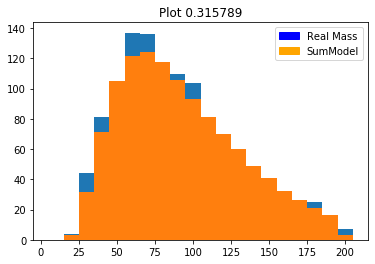

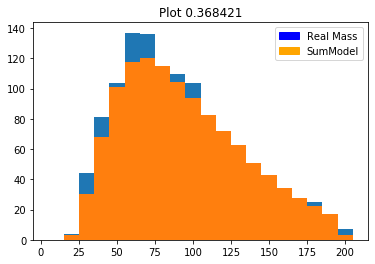

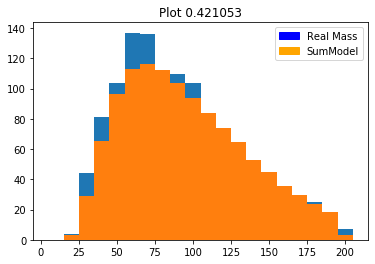

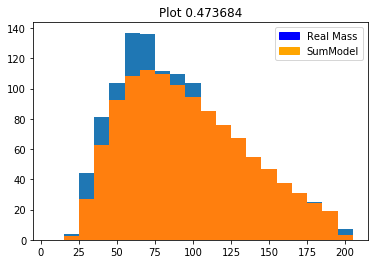

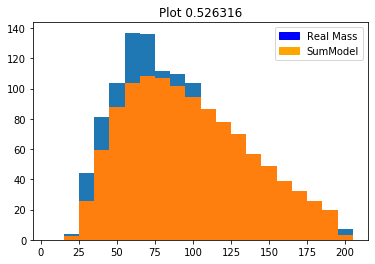

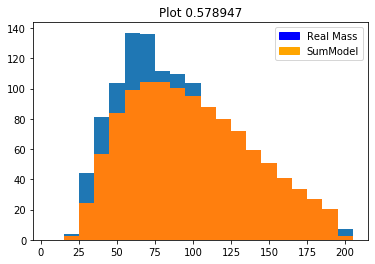

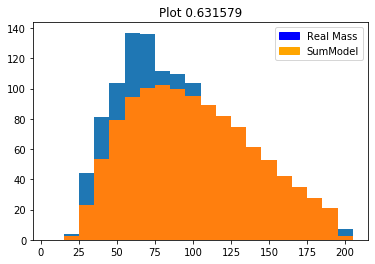

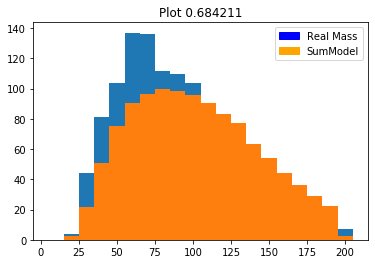

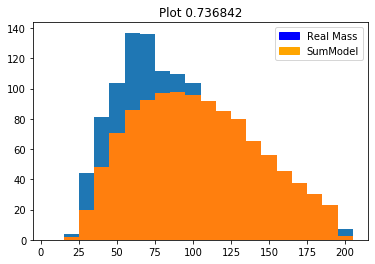

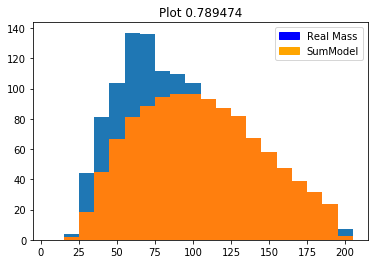

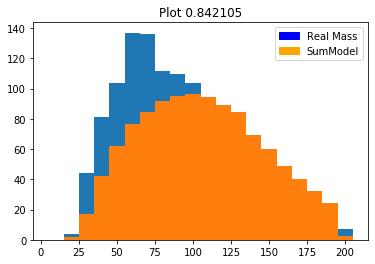

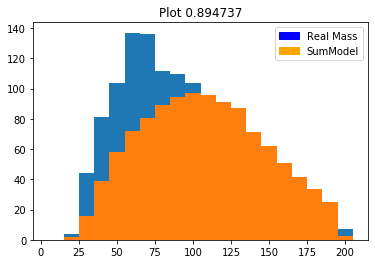

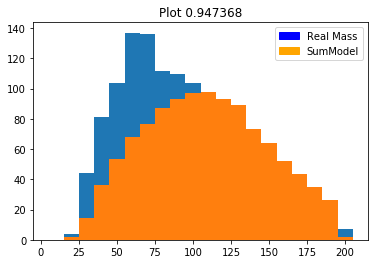

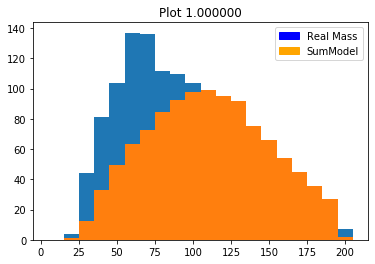

In [150]:
np.where(sd==np.min(sd))
print(xs[np.where(sd==np.min(sd))])

for i in x:
    plt.figure()
    plt.title('Plot %f'%i)
    plt.bar(real_mass_bins, real_mass_3, width = 10)
    plt.legend(handles=[blue_patch])
    plt.bar(real_mass_bins, sumModel(i), width = 10)
    plt.legend(handles=[blue_patch, orange_patch])